<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorios N°06

In [2]:
#Repaso:
# ajustar modelo:
#import statsmodels.api as sm

#model = sm.OLS(y_train, sm.add_constant(X_train))
#results = model.fit()
# resultados del modelo
#print(results.summary())

<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1iLbdUKIrQByZ_yJFKOonV2VK4UL1aMvA" width = "400" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")
data.head()


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

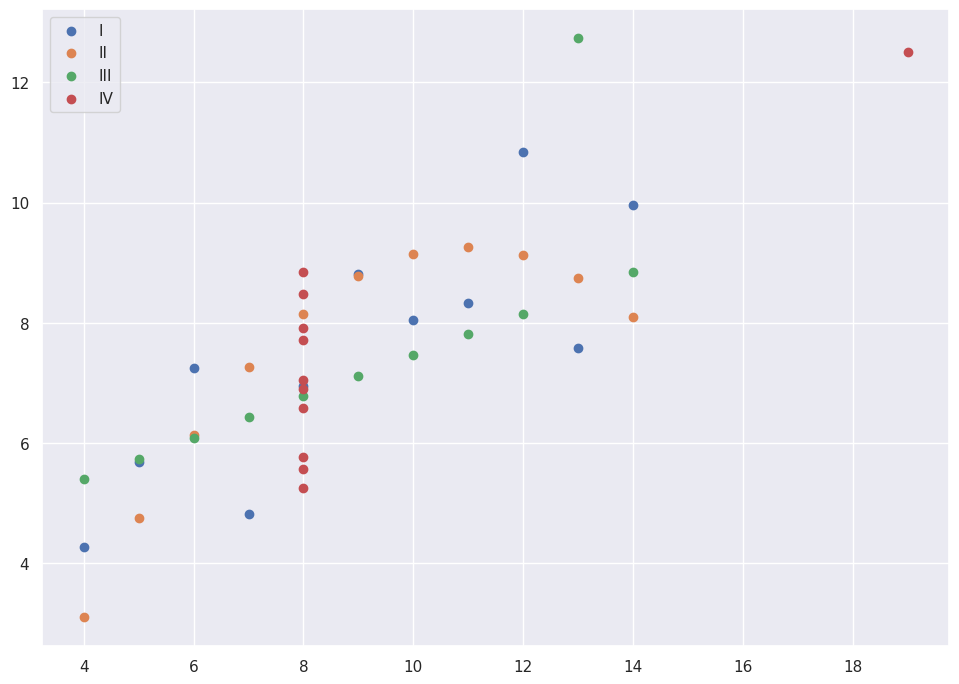

In [5]:
# grafico
for set in data['dataset'].unique():
  subset = data[data['dataset'] == set]
  plt.scatter(subset['x'], subset['y'], label=set )
plt.legend()
plt.show()

2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando `describe` para cada grupo. Interprete.

In [6]:
for set in data['dataset'].unique():
  print(set)
  print(data[data['dataset'] == set].describe())

I
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000
II
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000
III
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000
IV
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.000000   8.190000
max    1

Vemos que las medidas estadísticas de cada set de datos son muy parecidas, a pesar de tener distribuciones distintas.

3. Realice un ajuste lineal (con **sklearn**) y calcule los resultados de las métricas para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

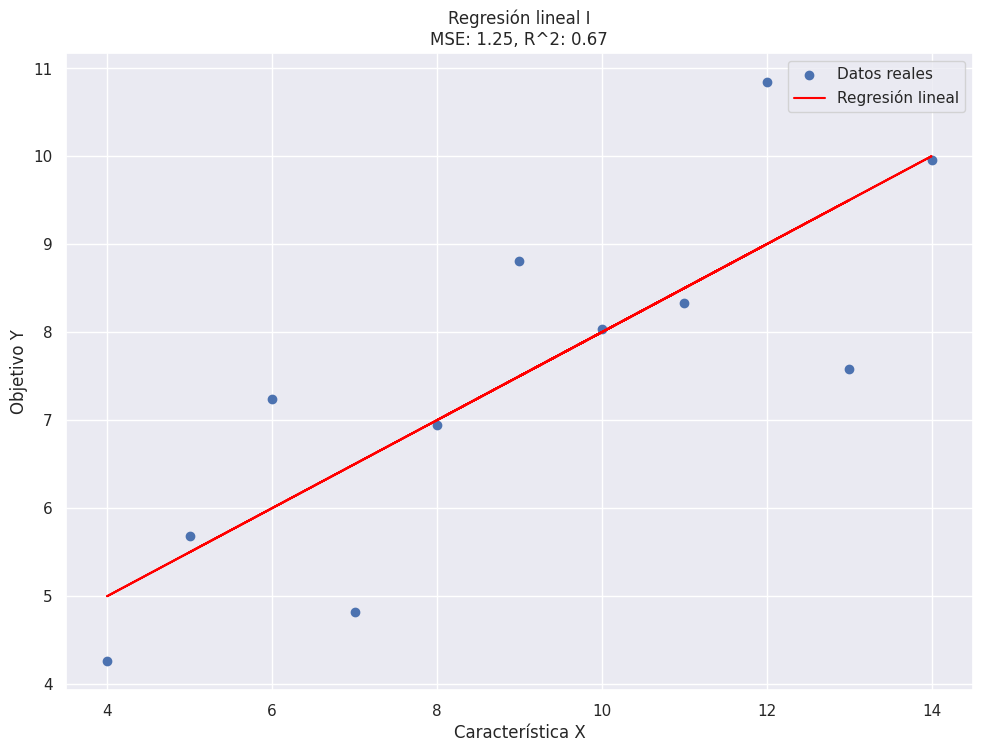

Grupo: I
MSE: 1.25
R^2: 0.67




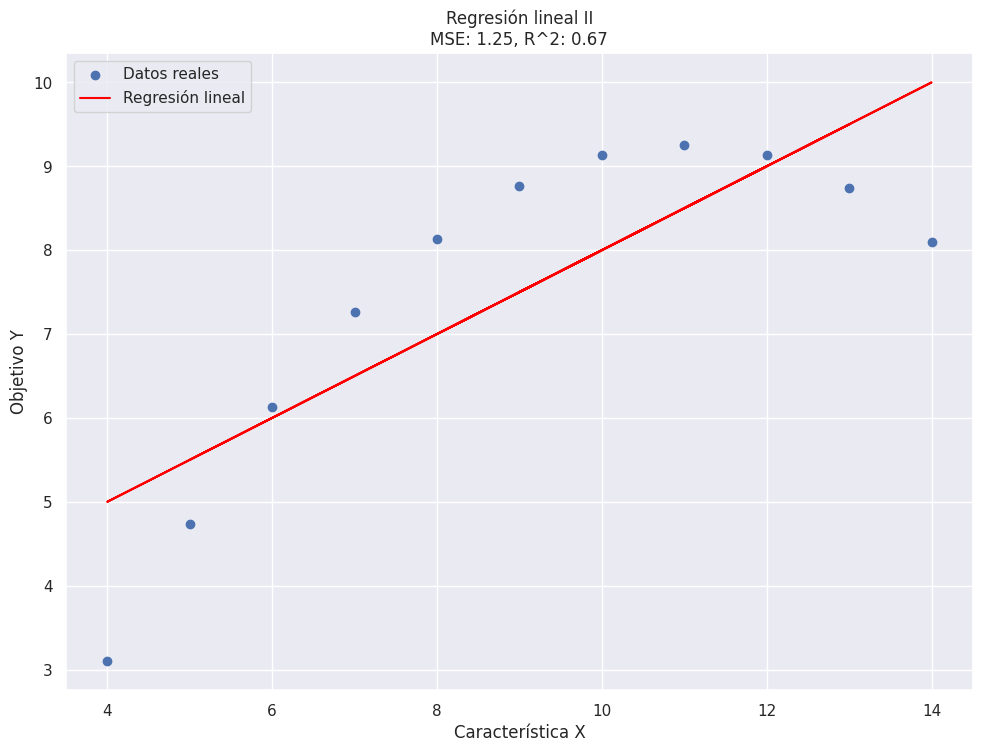

Grupo: II
MSE: 1.25
R^2: 0.67




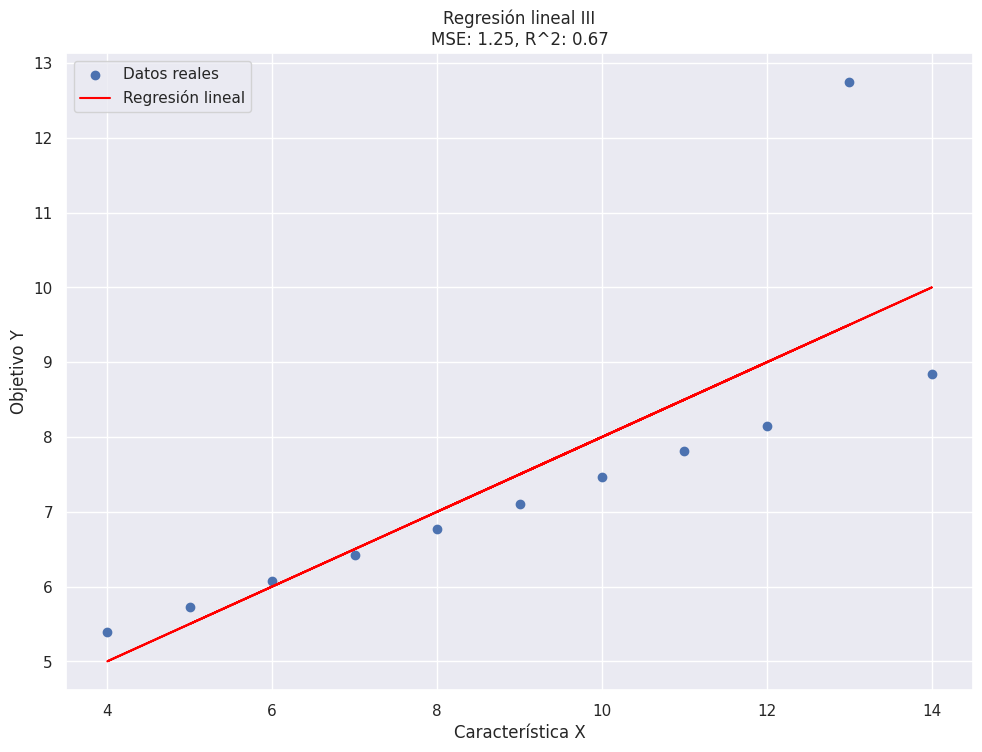

Grupo: III
MSE: 1.25
R^2: 0.67




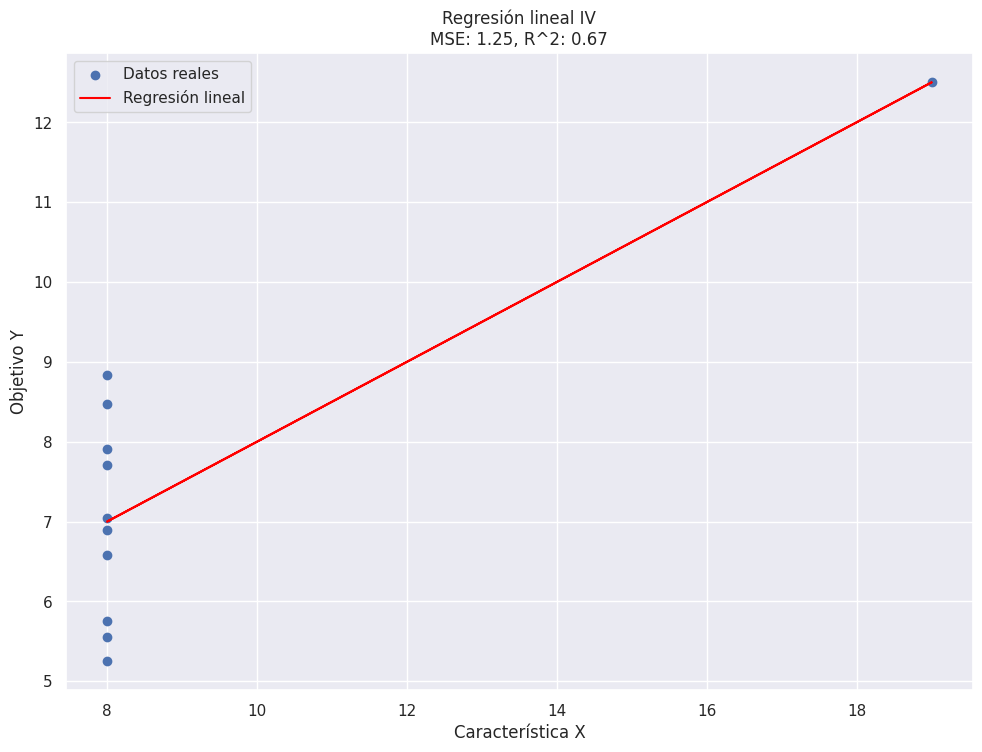

Grupo: IV
MSE: 1.25
R^2: 0.67




In [8]:
for set in data['dataset'].unique():
    # Filtrar datos para el grupo actual
    grupo_data = data[data['dataset'] == set]

    # Separar data
    X = grupo_data['x'].values.reshape(-1,1)
    y = grupo_data['y'].values

    # Modelo de regresión lineal
    modelo = LinearRegression()
    modelo.fit(X, y)

    # Realizar predicciones
    y_pred = modelo.predict(X)

    # Calcular métricas
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Graficar los resultados de la regresión lineal
    plt.scatter(X, y, label='Datos reales')
    plt.plot(X, y_pred, color='red', label='Regresión lineal')
    plt.xlabel('Característica X')
    plt.ylabel('Objetivo Y')
    plt.title(f'Regresión lineal {set}\nMSE: {mse:.2f}, R^2: {r2:.2f}')
    plt.legend()
    plt.show()

    # Imprimir las métricas
    print(f'Grupo: {set}')
    print(f'MSE: {mse:.2f}')
    print(f'R^2: {r2:.2f}')
    print('\n')








Los sets de datos tienen la misma regresión lineal, con igual $R^2$ y MSE, a pesar de tener una distribución distinta entre sí.

4. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

Para el set I, el modelo ajusta bien. \\
Para el set II, es más adecuado ajustar a un modelo cuadrático. \\
Para el set III, se debe eliminar el décimo dato, que es un outlier, \\
Para el set IV, se debe utilizar la columna de x para los datos de y y visceversa (dar vuelta los ejes).